# Intro to SQL: Tutorial and Applications
For further tutorials and documentation, check out: Note: https://mode.com/sql-tutorial/introduction-to-sql/

Now! We'll be using sqlite to access a database. Start by downloading the sql lite file and putting it in the same directory as this notebook:
Our data today is going to be sourced from:

https://www.kaggle.com/datasets/kaggle/sf-salaries

https://www.kaggle.com/datasets/luizpaulodeoliveira/imdb-project-sql

We'll just provide the raw files to you here to speed things up.

The following code will use sqlite to create a database connection.

In [15]:
import sqlite3 # Python's built-in module way of interacting with SQL files
import pandas as pd

conn = sqlite3.connect("database.sqlite")
#crsr = conn.cursor()

# Exploration

Exercise 1:
Retrieve a DataFrame containing the employee's name, their job title, and how much they are paid overtime from the Salaries table

In [20]:
query = 'SELECT EmployeeName, JobTitle, OvertimePay FROM Salaries;'

df = pd.read_sql(query, conn)
df.head()

,EmployeeName,JobTitle,OvertimePay
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,0
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),245131.88
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),106088.18
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,56120.71
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",9737


Exercise 2: Modify your query from Problem 1 to retrieve only records from years greater than 2014

In [23]:
query = 'SELECT EmployeeName, JobTitle, BasePay, Year FROM Salaries WHERE Year > 2014'

df = pd.read_sql(query, conn)
df.head()

,EmployeeName,JobTitle,BasePay,Year
0,Gregory P Suhr,Chief of Police,319275.01,2013
1,Joanne M Hayes-White,"Chief, Fire Department",313686.01,2013
2,Samson Lai,"Battalion Chief, Fire Suppress",186236.42,2013
3,Ellen G Moffatt,Asst Med Examiner,272855.51,2013
4,Robert L Shaw,"Dep Dir for Investments, Ret",315572.01,2013


Exercise 3: Let's further limit the table to the year ONLY 2012, employees making under 50,000, and sort in descending order by salary.

In [35]:
query = 'SELECT EmployeeName, JobTitle, BasePay FROM Salaries WHERE Year = 2012 AND BasePay < 50000 ORDER BY BasePay DESC'

df = pd.read_sql(query, conn)
df.head()

,EmployeeName,JobTitle,BasePay
0,Rogelio Orias,Porter,49989.33
1,Violeta Stelmak,Principal Clerk,49989.21
2,Abraham Paul Figueroa,Automotive Mechanic,49982.58
3,Richard Hernandez,Gardener,49980.66
4,Marty Guy,Truck Driver,49978.17


# Aggregation

Exercise 4: Let's now start gathering and manipulating the data in these tables. Find the highest Benefits value from the Salaries table.

In [37]:
query = 'SELECT MAX(TotalPayBenefits) AS MaxBenefits FROM Salaries;'

df = pd.read_sql(query, conn)
df.head()

,MaxBenefits
0,567595.43


Exercise 5: Produce and print the head of a dataframe that shows the average pay for each year (only use a single, simple query). Your result should have a column for the year and a column for the average base pay.

In [39]:
query = 'SELECT Year, AVG(BasePay) AS AverageBasePay FROM Salaries GROUP BY Year'

df = pd.read_sql(query, conn)
df.head()

,Year,AverageBasePay
0,2011,63595.956517
1,2012,65436.406857
2,2013,68509.832156
3,2014,66557.437750


Exercise 6: Create a DataFrame with the average BasePay, OtherPay, and Benefits for each JobTitle, and include a column showing the sum of these three values.

In [41]:
query = '''SELECT JobTitle,
  AVG(BasePay) AS AvgBasePay,
  AVG(OtherPay) AS AvgOtherPay,
  AVG(Benefits) AS AvgBenefits,
  (AVG(BasePay) + AVG(OtherPay) + AVG(Benefits)) AS TotalCompensation
  FROM Salaries GROUP BY JobTitle;'''
df = pd.read_sql(query, conn)

df.head()

,JobTitle,AvgBasePay,AvgOtherPay,AvgBenefits,TotalCompensation
0,ACCOUNT CLERK,43300.806506,361.656988,0.00,43662.463494
1,ACCOUNTANT,46643.172000,786.096000,0.00,47429.268000
2,ACCOUNTANT INTERN,28732.663958,274.648333,0.00,29007.312292
3,"ACPO,JuvP, Juv Prob (SFERS)",62290.780000,0.000000,17975.59,80266.370000
4,ACUPUNCTURIST,66374.400000,1220.000000,0.00,67594.400000


# Table Creation

Exercise 7: Now we'll create our own table in our database. Note, there is a difference in tables and columns! Separate the Salaries table by Year, and create new tables based on Year


In [44]:
for y in ['2011','2012','2013','2014']:
    query = f"SELECT * FROM Salaries WHERE Year = {y};"
    df = pd.read_sql(query, conn)
    df.to_sql(name='Y'+y, con=conn, if_exists='replace')

df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,110532,David Shinn,Deputy Chief 3,129150.01,0,342802.63,38780.04,471952.64,510732.68,2014,,San Francisco,PT
1,110533,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,,San Francisco,FT
2,110534,William J Coaker Jr.,Chief Investment Officer,257340,0,82313.7,96570.66,339653.70,436224.36,2014,,San Francisco,PT
3,110535,Gregory P Suhr,Chief of Police,307450.04,0,19266.72,91302.46,326716.76,418019.22,2014,,San Francisco,FT
4,110536,Joanne M Hayes-White,"Chief, Fire Department",302068,0,24165.44,91201.66,326233.44,417435.10,2014,,San Francisco,FT


# Table Joining

Problem 8:

Let's use a different database this time, one with two tables, so that we can work with data from both.

Let's load the sqlite file same as before. Start by just selecting everything in the "movies"  and "directors" table to see what it looks like.

In [46]:
conn = sqlite3.connect("movies.sqlite")
query = 'SELECT * FROM movies'

df = pd.read_sql(query, conn)
df.head()

,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id
0,43597,Avatar,237000000,150,2009-12-10,2787965087,Avatar,7.2,11800,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,19995,4762
1,43598,Pirates of the Caribbean: At World's End,300000000,139,2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",285,4763
2,43599,Spectre,245000000,107,2015-10-26,880674609,Spectre,6.3,4466,A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,206647,4764
3,43600,The Dark Knight Rises,250000000,112,2012-07-16,1084939099,The Dark Knight Rises,7.6,9106,Following the death of District Attorney Harve...,The Legend Ends,49026,4765
4,43601,John Carter,260000000,43,2012-03-07,284139100,John Carter,6.1,2124,"John Carter is a war-weary, former military ca...","Lost in our world, found in another.",49529,4766


Let's do the same, but now with the directors table, to see its fields as well

In [47]:
query = 'SELECT * FROM directors'

df = pd.read_sql(query, conn)
df.head()

,name,id,gender,uid,department
0,James Cameron,4762,2,2710,Directing
1,Gore Verbinski,4763,2,1704,Directing
2,Sam Mendes,4764,2,39,Directing
3,Christopher Nolan,4765,2,525,Directing
4,Andrew Stanton,4766,2,7,Directing


# The real power of SQL! Searching and combining across tables

Our goal is to create a dataframe that includes the entire contents of "movies" table as well as the director's name, from the directors table

In [57]:
query = 'SELECT movies.*, directors.name AS DirectorName FROM movies JOIN directors ON movies.director_id = directors.id'
df = pd.read_sql(query, conn)
df.head()

,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id,DirectorName
0,43597,Avatar,237000000,150,2009-12-10,2787965087,Avatar,7.2,11800,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,19995,4762,James Cameron
1,43598,Pirates of the Caribbean: At World's End,300000000,139,2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",285,4763,Gore Verbinski
2,43599,Spectre,245000000,107,2015-10-26,880674609,Spectre,6.3,4466,A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,206647,4764,Sam Mendes
3,43600,The Dark Knight Rises,250000000,112,2012-07-16,1084939099,The Dark Knight Rises,7.6,9106,Following the death of District Attorney Harve...,The Legend Ends,49026,4765,Christopher Nolan
4,43601,John Carter,260000000,43,2012-03-07,284139100,John Carter,6.1,2124,"John Carter is a war-weary, former military ca...","Lost in our world, found in another.",49529,4766,Andrew Stanton


Let's now modify the previous query so that it only includes movies released after 2010 and with a vote_average greater than 7.5.

In [55]:
query = '''SELECT movies.*, directors.name AS DirectorName FROM movies JOIN directors ON movies.director_id = directors.id
           WHERE release_date > '2010-01-01' AND vote_average > 7.5;'''

df = pd.read_sql(query, conn)
df.head()

,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id,DirectorName
0,43600,The Dark Knight Rises,250000000,112,2012-07-16,1084939099,The Dark Knight Rises,7.6,9106,Following the death of District Attorney Harve...,The Legend Ends,49026,4765,Christopher Nolan
1,43619,The Hobbit: The Desolation of Smaug,250000000,94,2013-12-11,958400000,The Hobbit: The Desolation of Smaug,7.6,4524,"The Dwarves, Bilbo and Gandalf have successful...",Beyond darkness... beyond desolation... lies t...,57158,4777,Peter Jackson
2,43639,Toy Story 3,200000000,59,2010-06-16,1066969703,Toy Story 3,7.6,4597,"Woody, Buzz, and the rest of Andy's toys haven...",No toy gets left behind.,10193,4792,Lee Unkrich
3,43671,Edge of Tomorrow,178000000,79,2014-05-27,370541256,Edge of Tomorrow,7.6,4858,Major Bill Cage is an officer who has never se...,"Live, Die, Repeat",137113,4813,Doug Liman
4,43674,Inside Out,175000000,128,2015-06-09,857611174,Inside Out,8.0,6560,"Growing up can be a bumpy road, and it's no ex...",Meet the little voices inside your head.,150540,4806,Pete Docter


# Subqueries: For more complicated queries

Let's now brielfly showcase the concept of subqueries. Retrieve the titles of all movies that have a budget higher than the average budget of all movies in the database.

In [56]:
query = 'SELECT title FROM movies WHERE budget > (SELECT AVG(budget) FROM movies);'

df = pd.read_sql(query, conn)
df.head()

,title
0,Avatar
1,Pirates of the Caribbean: At World's End
2,Spectre
3,The Dark Knight Rises
4,John Carter


# Applications in SQL!

(Description)

In [ ]:
%%capture --no-stderr
%pip install --upgrade --quiet langchain-community langchainhub langgraph

In [ ]:
# # Comment out the below to opt-out of using LangSmith in this notebook. Not required.
# if not os.environ.get("LANGSMITH_API_KEY"):
#     os.environ["LANGSMITH_API_KEY"] = getpass.getpass()
#     os.environ["LANGSMITH_TRACING"] = "true"

In [ ]:
# Install sqlite3
!apt-get install -y sqlite3

# Download the SQL file
!wget https://raw.githubusercontent.com/lerocha/chinook-database/master/ChinookDatabase/DataSources/Chinook_Sqlite.sql -O chinook.sql

# Create and populate the database
!sqlite3 Chinook.db < chinook.sql

# Verify the database was created
!ls -la Chinook.db

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  sqlite3-doc
The following NEW packages will be installed:
  sqlite3
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 768 kB of archives.
After this operation, 1,873 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 sqlite3 amd64 3.37.2-2ubuntu0.3 [768 kB]
Fetched 768 kB in 0s (2,685 kB/s)
Selecting previously unselected package sqlite3.
(Reading database ... 124947 files and directories currently installed.)
Preparing to unpack .../sqlite3_3.37.2-2ubuntu0.3_amd64.deb ...
Unpacking sqlite3 (3.37.2-2ubuntu0.3) ...
Setting up sqlite3 (3.37.2-2ubuntu0.3) ...
Processing triggers for man-db (2.10.2-1) ...
--2025-03-08 05:19:14--  https://raw.githubusercontent.com/lerocha/chinook-database/master/ChinookDatabase/DataSources/Chinook_Sqlite.sql
Resolving raw.githubusercontent.com (raw.githubuserco

In [53]:
from langchain_community.utilities import SQLDatabase

db = SQLDatabase.from_uri("sqlite:///Chinook.db")
print(db.dialect)
print(db.get_usable_table_names())
db.run("SELECT * FROM Artist LIMIT 10;")

NameError: name 'SQLDatabase' is not defined

In [51]:
from typing_extensions import TypedDict


class State(TypedDict):
    question: str
    query: str
    result: str
    answer: str

In [ ]:
!pip install -qU "langchain[groq]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 2.5 MB/s eta 0:00:00


In [ ]:
import getpass
import os

if not os.environ.get("GROQ_API_KEY"):
  os.environ["GROQ_API_KEY"] = getpass.getpass("Enter API key for Groq: ")

from langchain.chat_models import init_chat_model

llm = init_chat_model("llama3-8b-8192", model_provider="groq")

Enter API key for Groq: ··········


In [ ]:
from langchain import hub

query_prompt_template = hub.pull("langchain-ai/sql-query-system-prompt")

assert len(query_prompt_template.messages) == 1
query_prompt_template.messages[0].pretty_print()

================================ System Message ================================

Given an input question, create a syntactically correct {dialect} query to run to help find the answer. Unless the user specifies in his question a specific number of examples they wish to obtain, always limit your query to at most {top_k} results. You can order the results by a relevant column to return the most interesting examples in the database.

Never query for all the columns from a specific table, only ask for a the few relevant columns given the question.

Pay attention to use only the column names that you can see in the schema description. Be careful to not query for columns that do not exist. Also, pay attention to which column is in which table.

Only use the following tables:
{table_info}

Question: {input}


/usr/local/lib/python3.11/dist-packages/langsmith/client.py:253: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [ ]:
from typing_extensions import Annotated


class QueryOutput(TypedDict):
    """Generated SQL query."""

    query: Annotated[str, ..., "Syntactically valid SQL query."]


def write_query(state: State):
    """Generate SQL query to fetch information."""
    prompt = query_prompt_template.invoke(
        {
            "dialect": db.dialect,
            "top_k": 10,
            "table_info": db.get_table_info(),
            "input": state["question"],
        }
    )
    structured_llm = llm.with_structured_output(QueryOutput)
    result = structured_llm.invoke(prompt)
    return {"query": result["query"]}

In [ ]:
write_query({"question": "How many Employees are there?"})

{'query': 'SELECT COUNT(*) FROM Employee'}

In [ ]:
from langchain_community.tools.sql_database.tool import QuerySQLDatabaseTool


def execute_query(state: State):
    """Execute SQL query."""
    execute_query_tool = QuerySQLDatabaseTool(db=db)
    return {"result": execute_query_tool.invoke(state["query"])}

In [ ]:
execute_query({"query": "SELECT COUNT(EmployeeId) AS EmployeeCount FROM Employee;"})

{'result': '[(8,)]'}

In [ ]:
def generate_answer(state: State):
    """Answer question using retrieved information as context."""
    prompt = (
        "Given the following user question, corresponding SQL query, "
        "and SQL result, answer the user question.\n\n"
        f'Question: {state["question"]}\n'
        f'SQL Query: {state["query"]}\n'
        f'SQL Result: {state["result"]}'
    )
    response = llm.invoke(prompt)
    return {"answer": response.content}

In [ ]:
from langgraph.graph import START, StateGraph

graph_builder = StateGraph(State).add_sequence(
    [write_query, execute_query, generate_answer]
)
graph_builder.add_edge(START, "write_query")
graph = graph_builder.compile()

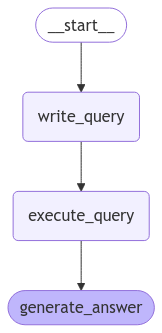

In [ ]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
for step in graph.stream(
    {"question": "How many employees are there?"}, stream_mode="updates"
):
    print(step)

{'write_query': {'query': 'SELECT COUNT(*) FROM Employee'}}
{'execute_query': {'result': '[(8,)]'}}
{'generate_answer': {'answer': 'According to the SQL result, there are 8 employees.'}}


In [ ]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()
graph = graph_builder.compile(checkpointer=memory, interrupt_before=["execute_query"])

# Now that we're using persistence, we need to specify a thread ID
# so that we can continue the run after review.
config = {"configurable": {"thread_id": "1"}}

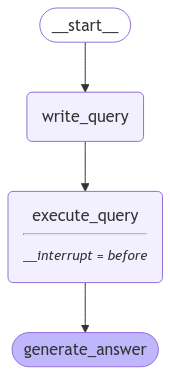

In [ ]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
for step in graph.stream(
    {"question": "How many employees are there?"},
    config,
    stream_mode="updates",
):
    print(step)

try:
    user_approval = input("Do you want to go to execute query? (yes/no): ")
except Exception:
    user_approval = "no"

if user_approval.lower() == "yes":
    # If approved, continue the graph execution
    for step in graph.stream(None, config, stream_mode="updates"):
        print(step)
else:
    print("Operation cancelled by user.")

{'write_query': {'query': 'SELECT COUNT(*) FROM Employee'}}
{'__interrupt__': ()}
Do you want to go to execute query? (yes/no): yes
{'execute_query': {'result': '[(8,)]'}}
{'generate_answer': {'answer': 'According to the SQL result [(8,)], there are 8 employees.'}}
